In [34]:
%matplotlib inline
import pandas as pd

In [43]:
data = pd.read_csv("/data/aamw3/gaia_dr1/tgas_raveon.csv")

In [44]:
data = data.dropna() #get rid of any stars where *anything* is not measured...
idx = (1./data['parallax']<3.)&(data['parallax']>0.)&(data['teff']<7000.)&(np.abs(data['pmra'])<100.)&(np.abs(data['pmdec'])<100.)&\
(np.abs(data['vhel'])<200.)
data=data[idx]

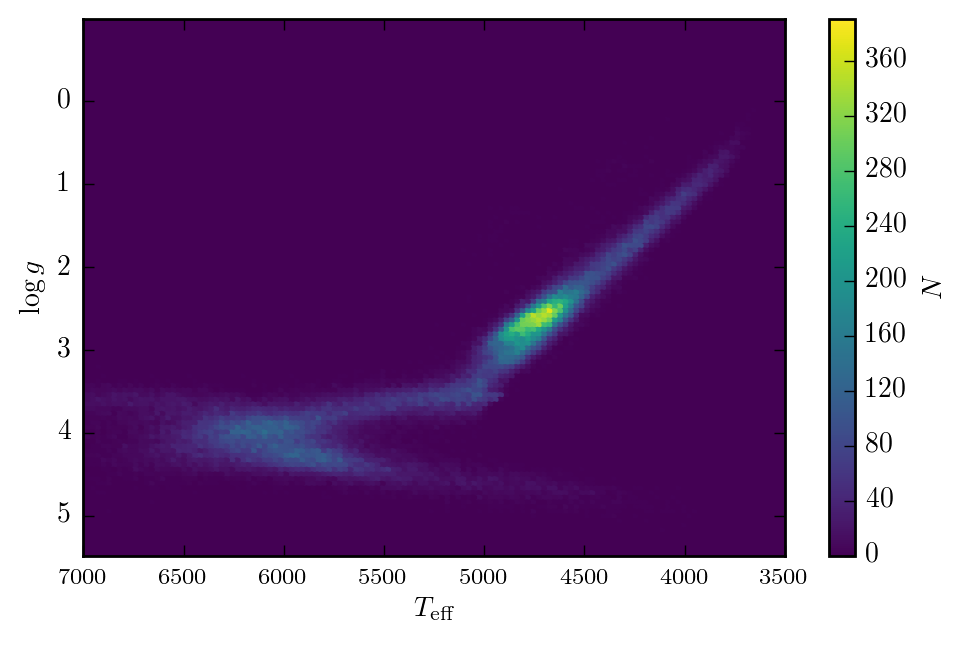

In [76]:
plt.hexbin(data['teff'],data['logg'],gridsize=200,cmap="viridis")
plt.xlim((7000.,3500.))
plt.gca().invert_yaxis()
plt.colorbar(label="$N$")
plt.xlabel("$T_\mathrm{eff}$")
plt.ylabel("$\\log g$")

In [56]:
x,y,z,vx,vy,vz = gu.obs2cartesian(data['pmra'],data['pmdec'],data['ra'],data['dec'],1./data['parallax'],data['vhel'],radec_pms=True)
idx = (x>7.)&(x<10.)&(np.abs(vx)<150.)&(np.abs(vy+240.)<100.)&(np.abs(vz)<100.)&(y<1)&(y>-0.5)&(np.abs(z)<1.)
x,y,z,vx,vy,vz = x[idx],y[idx],z[idx],vx[idx],vy[idx],vz[idx]

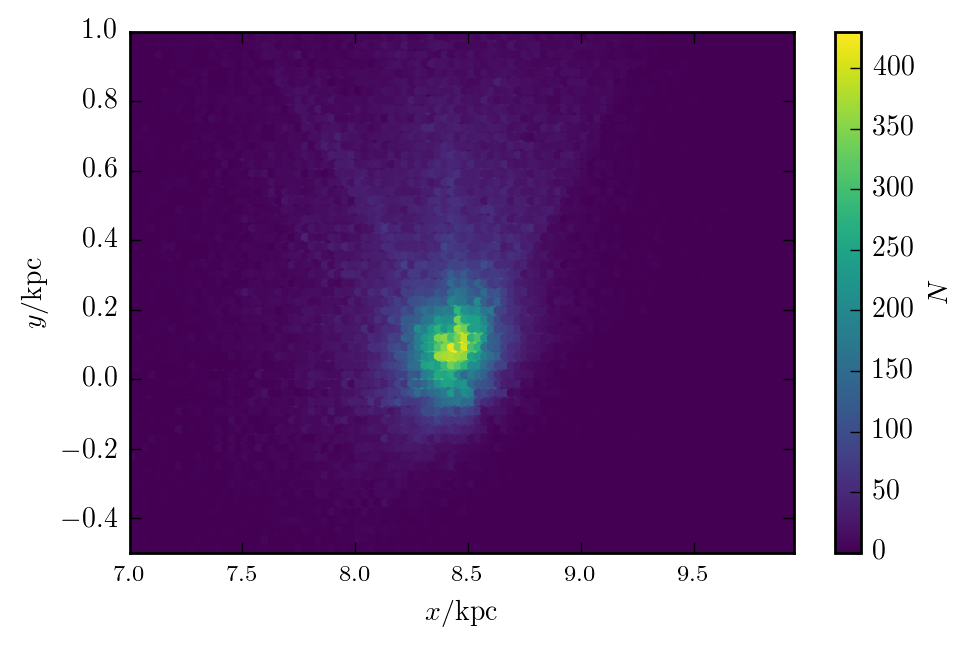

In [79]:
plt.hexbin(x,y,cmap="viridis")
plt.colorbar(label="$N$")
plt.xlabel("$x/$kpc")
plt.ylabel("$y/$kpc")

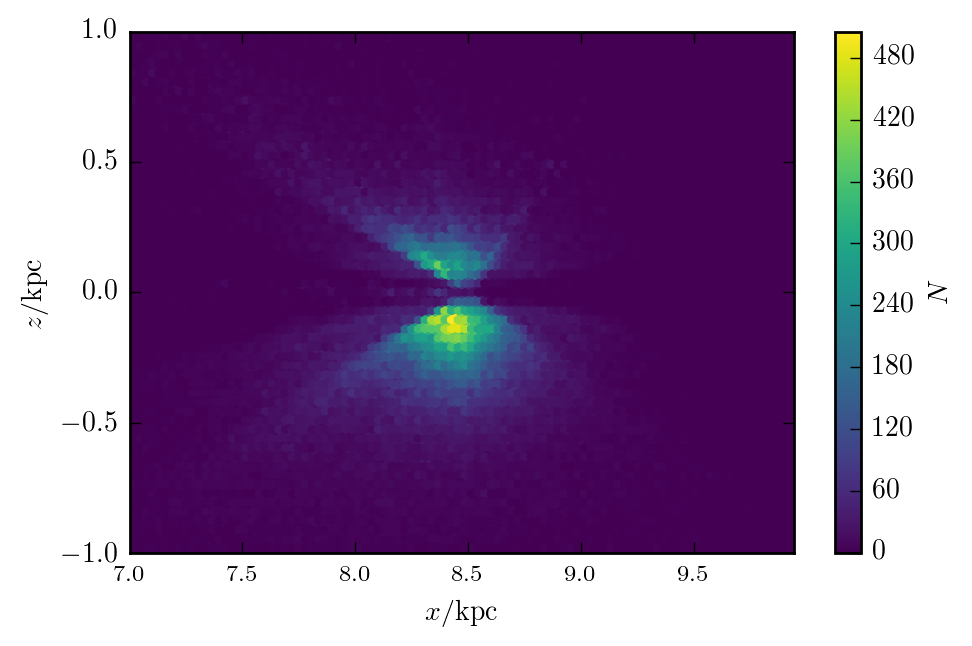

In [80]:
plt.hexbin(x,z,cmap="viridis")
plt.colorbar(label="$N$")
plt.xlabel("$x/$kpc")
plt.ylabel("$z/$kpc")

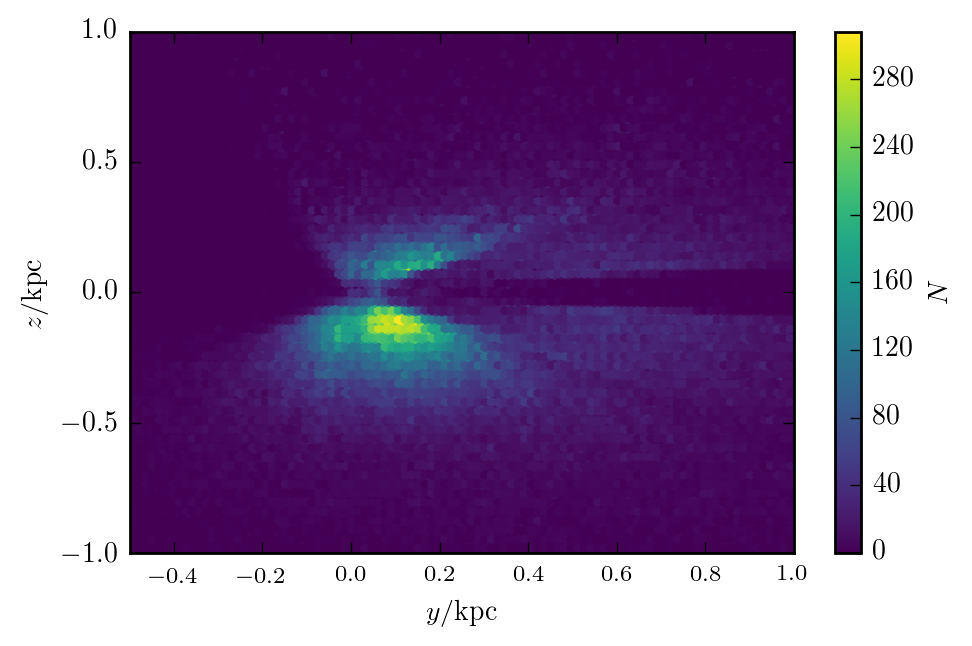

In [81]:
plt.hexbin(y,z,cmap="viridis")
plt.colorbar(label="$N$")
plt.xlabel("$y/$kpc")
plt.ylabel("$z/$kpc")

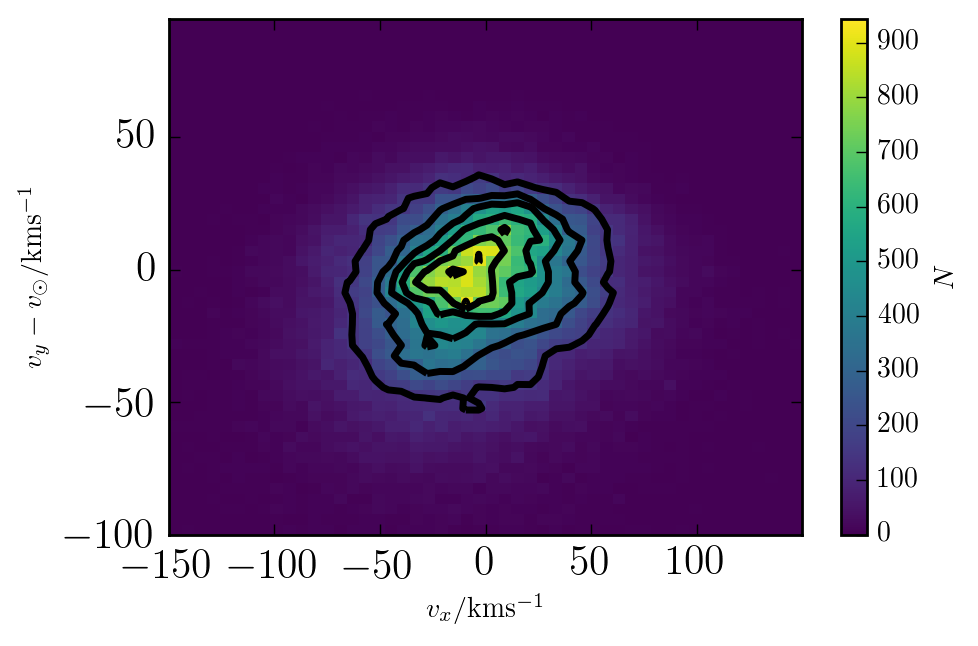

In [90]:
pl.gus_contour(-vx,-(vy+240.),nbins=50,ncontours=8,histunder=True,cmap="viridis")
plt.xlabel("$v_x/\mathrm{kms^{-1}}$")
plt.ylabel("$v_y-v_\\odot/\mathrm{kms^{-1}}$")
plt.colorbar(label="$N$")

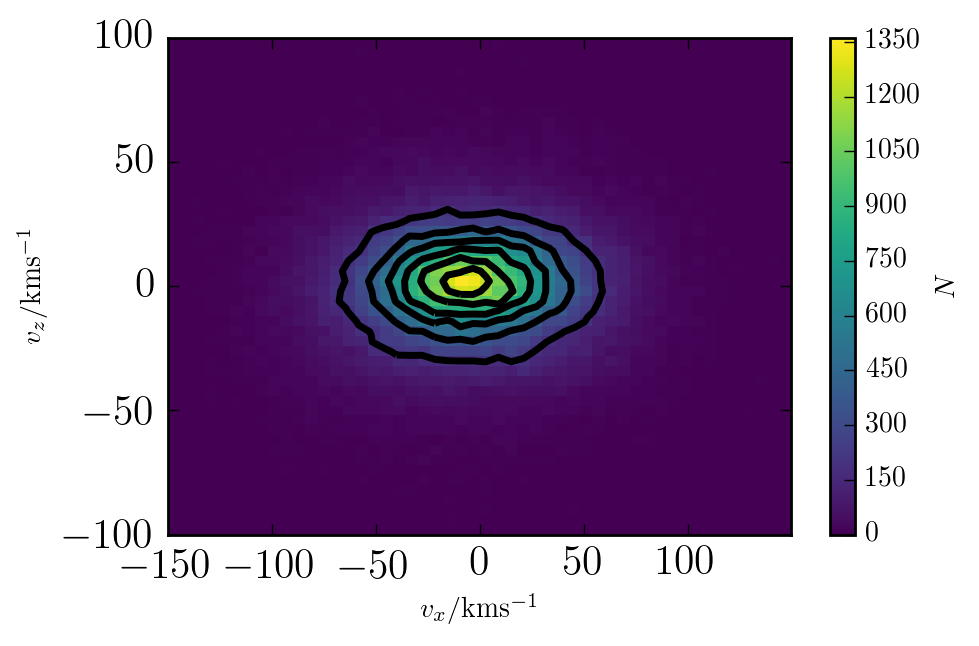

In [91]:
pl.gus_contour(-vx,vz,nbins=50,ncontours=8,histunder=True,cmap="viridis")
plt.xlabel("$v_x/\mathrm{kms^{-1}}$")
plt.ylabel("$v_z/\mathrm{kms^{-1}}$")
plt.colorbar(label="$N$")

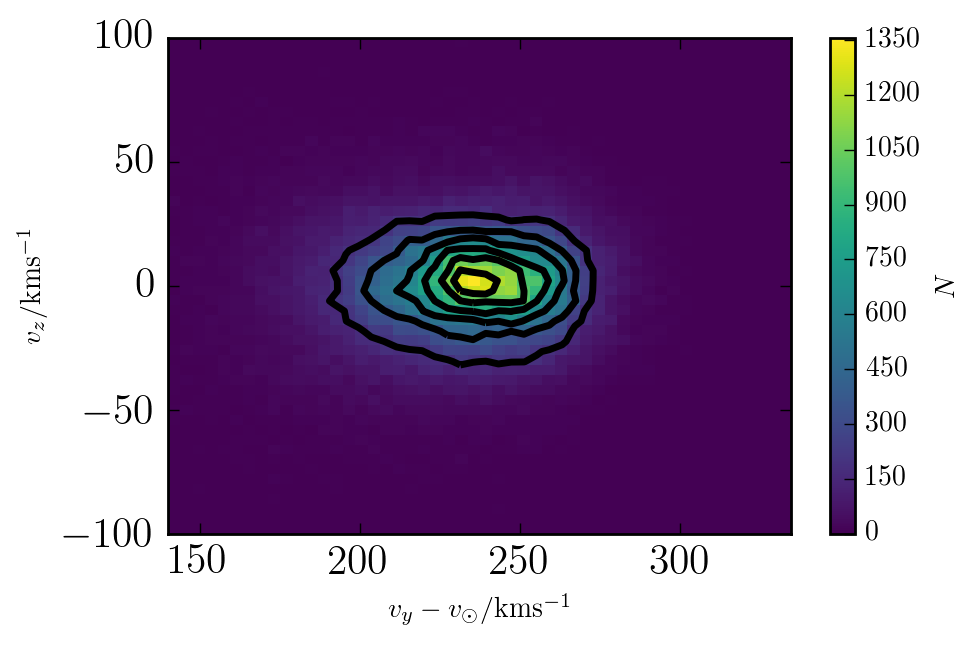

In [92]:
pl.gus_contour(-vy,vz,nbins=50,ncontours=8,histunder=True,cmap="viridis")
plt.xlabel("$v_y-v_\odot/\mathrm{kms^{-1}}$")
plt.ylabel("$v_z/\mathrm{kms^{-1}}$")
plt.colorbar(label="$N$")
